<a href="https://colab.research.google.com/github/andymirchellt/AndyPrimer/blob/main/Prac_1_pb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar Blibliotecas
import numpy as np 
import scipy.signal as sps 
import matplotlib.pyplot as plt
import pandas as pd 

In [ ]:
def aproximacion_Butterworth(Ap,Ar,fp,fr):
  N= int(np.ceil((np.log10((10**(Ap/10)-1)/(10**(Ar/10)-1)))/(2*np.log10(fp/fr))))
  fc=fp/(10**(Ap/10)-1)**(1/(2*N))
  return N,fc


In [ ]:
Ap=0.1
Ar=60
fp=100
fr=10000
N,fc=aproximacion_Butterworth(Ap,Ar,fp,fr)

In [ ]:
N

2

In [ ]:
def Butterworth_Pasabajas(N,fc):
  p = np.array([np.exp(1j*(2*k-1)*np.pi/(2*N))*(np.exp(-1j*np.pi/2)) for k in range(1,2*N+1)])
  p=np.array([2*np.pi*fc*pi for pi in p if pi.real <=0])
  a=np.poly(p).real
  b=np.array([(2*np.pi*fc)**N])

  inx= np.argsort(p.real)
  p=p[inx]
  s=[]
  if N%2 !=0:
    bi=np.array([-p(0).real])
    ai=np.array([1, -p[0].real])
    s.append([bi,ai])
    p = p[1:]
  for i in range(0, p.shape[0], 2):
    ai=np.poly(p[i:i+2]).real      
    bi=np.array([ai[2]])
    s.append([bi,ai])

  return b,a,s

In [ ]:
b,a,s = Butterworth_Pasabajas(N,fc)
#plt.plot(p.real,p.imag,marker='x',linestyle='')
#phi=np.arange(0,1,0.01)*2*np.pi
#plt.plot(np.cos(phi), np.sin(phi), linestyle=':')
#plt.axis('square');
print (s)

[[array([2586706.14821554]), array([1.00000000e+00, 2.27451364e+03, 2.58670615e+06])]]


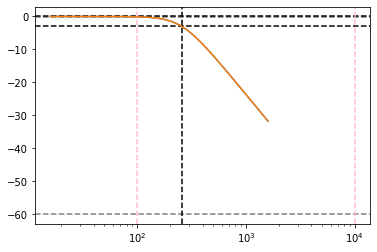

In [ ]:
W,H=sps.freqs(b,a)
f=W/(2*np.pi)
plt.semilogx(f, 20*np.log10(np.abs(H)));
plt.axhline(-Ap, color='gray', linestyle='--')
plt.axhline(-Ar, color='gray', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(-3, color='black', linestyle='--')
plt.axvline(fp, color='pink', linestyle='--')
plt.axvline(fr, color='pink', linestyle='--')
plt.axvline(fc, color='black', linestyle='--');

for [bi,ai] in s:
  _,H=sps.freqs(bi,ai,W)
  plt.semilogx(f, 20*np.log10(np.abs(H)));

In [ ]:
def secciones_sallen_key(s,C=1e-6):
  sk=[]
  for i , [bi,ai] in enumerate(s):
    if ai.shape[0]==2:
      R=1/(ai[1]*C)
      sk.append([R/1e3, R/1e3, C/1e-6])
    else:
      m= (ai[1]**2)/(4*ai[2])
      R1= ai[1]/(2*m*ai[2]*C)
      R2= ai[1]/(m*ai[2]*C)-R1
      sk.append([R1/1e3,R2/1e3,C/1e-6,m*C/1e-6])
  return sk

In [ ]:
sk = secciones_sallen_key(s) 

In [ ]:
sk

[[0.8793088620074464, 0.8793088620074464, 1.0, 0.5000000000000002]]